# Napier's bone: 九九のある世界

* [Multiplication table - Wikipedia](https://en.wikipedia.org/wiki/Multiplication_table)
    * [Napier's bones - Wikipedia](https://en.wikipedia.org/wiki/Napier%27s_bones)
    * [九九 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%B9%9D%E4%B9%9D)
        * [Japanese wordplay - Wikipedia](https://en.wikipedia.org/wiki/Japanese_wordplay)

## Napier's boneを描画する

In [18]:
import matplotlib.pyplot as plt

class napier_bone:

    def __init__(self):
        self.x = 0
        self.fig, self.ax = plt.subplots(figsize=(14, 8))

    def place(self, n, sqrt=False):
        self.x += 1.1
        x = self.x
        ax = self.ax

        if not n:
            for y in range(1,10):
                ax.plot(*zip((x,y),(x,y+1),(x+1,y+1),(x+1,y),(x,y)), color='black')
                ax.text(x+.4, y+.7, str(y), fontsize=18)
        else:
            ax.plot(*zip((x,0),(x,1),(x+1,1),(x+1,0),(x,0)), color='black')
            if sqrt:
                ax.text(x+.4, .7, "√", fontsize=18)
            else:
                ax.text(x+.4, .7, str(n), fontsize=18)
            for y in range(1,10):
                ax.plot(*zip((x,  y),(x,y+1),(x+1,y  ),(x,  y)),color='black')
                ax.plot(*zip((x+1,y),(x,y+1),(x+1,y+1),(x+1,y)),color='black')
                if sqrt:
                    d = "{:02d}".format(y**2)
                else:
                    d = "{:02d}".format(n*y)
                #if d[0] != '0':
                ax.text(x+.1, y+.5, str(d[0]), fontsize=14)
                ax.text(x+.6, y+.8, str(d[1]), fontsize=14)
                
    def draw(self):
        self.ax.set_aspect('equal', 'datalim')
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.show()

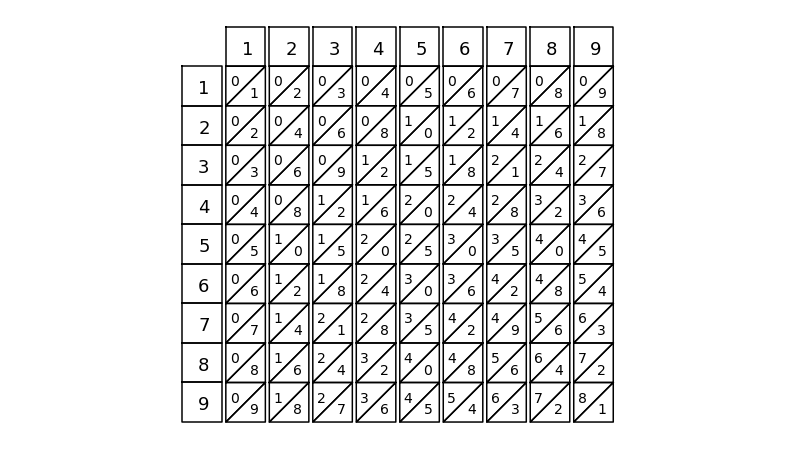

In [42]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(2)
nb.place(3)
nb.place(4)
nb.place(5)
nb.place(6)
nb.place(7)
nb.place(8)
nb.place(9)
#nb.place(True, sqrt=True)

nb.draw()

### Napier's bone を並べて$425 \times 6$ を求める

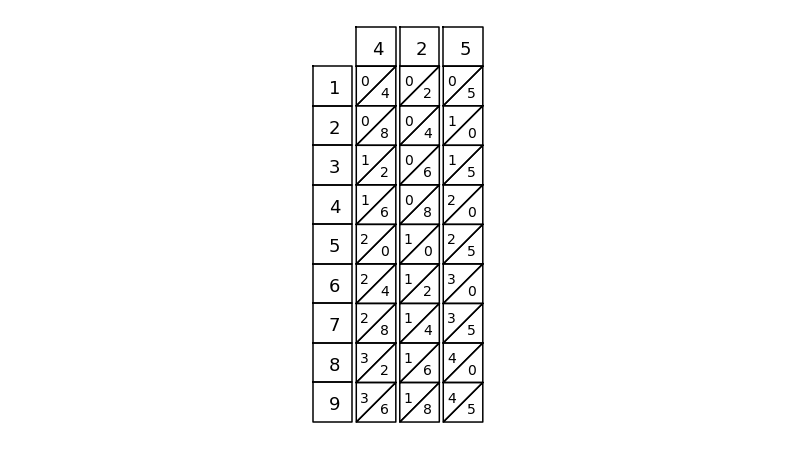

In [106]:
nb = napier_bone()

nb.place(0)
nb.place(4)
nb.place(2)
nb.place(5)

nb.draw()

6行目に注目して、$2 \times 1000 + (4+1) \times 100 + (2+3) \times 10 + 0$

In [16]:
425*6

2550

<pre>
 425
<u>×  6</u>
  30
 12
<u>24  </u>
2550
</pre>

```{note}
以下、補足です
```

## Napier's boneによる平開法

* "Decimal (base 10)"
  - [Methods of computing square roots - Wikipedia](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10))

In [47]:
# [Methods of computing square roots - Wikipedia]
# (https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10))

import itertools

def square_root_by_long_division(cif):
    # split by two digits, each side of period (integer.fractions)
    ci, cf = "{:.10f}".format(cif).split('.')
    ci = '0'*(len(ci)%2) + ci
    cf = cf + '0'*(len(cf)%2)

    cl = itertools.chain(*[[int(cx[i:i+2]) for i in range(0,len(cx),2)]
                           for cx in (ci, cf)])

    def cy(p, px):
        return ((2*p)*px)*10 + px**2
    
    p, r = 0, 0
    for c in cl:

        c += r*100
        print("place {:d} bone(s), to find largest less than current remainder: {:d}".format(2*p, c))
        # 2*p is the number that selects corresponding bones
        
        px = 0
        while cy(p, px+1) <= c:
            px+=1
        print("  from the {:d}-th row, {:d} is found".format(px, cy(p, px)))
        # px is 'quotient' (slected line number of selected bones)

        r = c - cy(p, px) # r is 'remainder'
        p = 10*p+px       # p is current value of square root
    # print(p, r)
    return p, r

In [48]:
square_root_by_long_division(2)

place 0 bone(s), to find largest less than current remainder: 2
  from the 1-th row, 1 is found
place 2 bone(s), to find largest less than current remainder: 100
  from the 4-th row, 96 is found
place 28 bone(s), to find largest less than current remainder: 400
  from the 1-th row, 281 is found
place 282 bone(s), to find largest less than current remainder: 11900
  from the 4-th row, 11296 is found
place 2828 bone(s), to find largest less than current remainder: 60400
  from the 2-th row, 56564 is found
place 28284 bone(s), to find largest less than current remainder: 383600
  from the 1-th row, 282841 is found


(141421, 100759)

### Napier's boneを並べて$2$の平方根を求める

In [107]:
square_root_by_long_division(2)

place 0 bone(s), to find largest less than current remainder: 2
from the 1-th row, 1 is found
place 2 bone(s), to find largest less than current remainder: 100
from the 4-th row, 96 is found
place 28 bone(s), to find largest less than current remainder: 400
from the 1-th row, 281 is found
place 282 bone(s), to find largest less than current remainder: 11900
from the 4-th row, 11296 is found
place 2828 bone(s), to find largest less than current remainder: 60400
from the 2-th row, 56564 is found
place 28284 bone(s), to find largest less than current remainder: 383600
from the 1-th row, 282841 is found


(141421, 100759)

<pre>
 <u>2 8 2 8 4 2</u>
)2            141421
 <u>1</u>
 100
 <u> 96</u>
   400
   <u>281</u>
   11900
   <u>11296</u>
     60400
     <u>56564</u>
      383600
      282841
</pre>

* place 0 bone(s), to find largest less than current remainder: 2
  - from the 1-th row, 1 is found

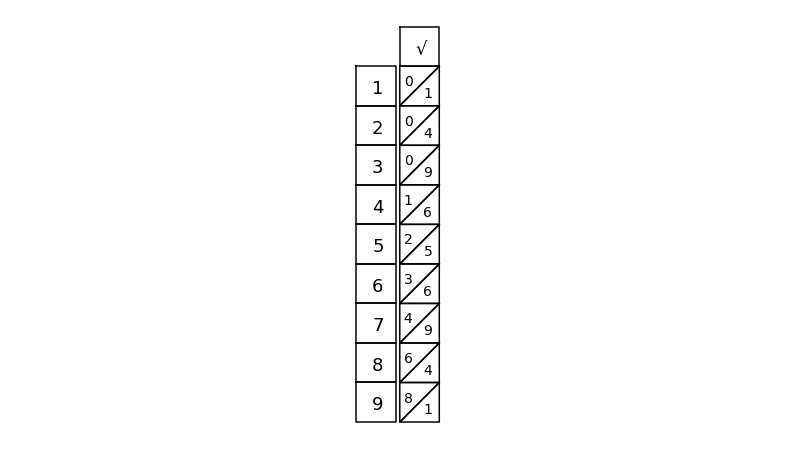

In [43]:
nb = napier_bone()

nb.place(0)
nb.place(True, sqrt=True)

nb.draw()

<pre>
 <u>  2</u>
)2    1
 <u>1</u>
 100
</pre>

* place 2 bone(s), to find largest less than current remainder: 100
  - from the 4-th row, 96 is found

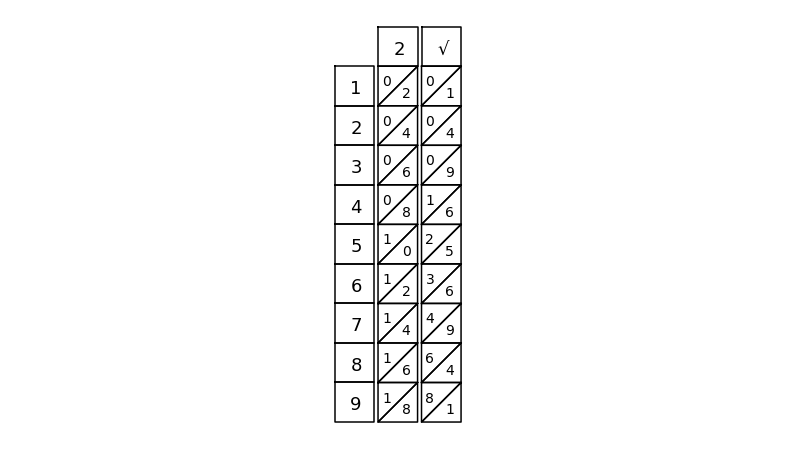

In [44]:
nb = napier_bone()

nb.place(0)
nb.place(2)
nb.place(True, sqrt=True)

nb.draw()

<pre>
 <u>  2 8</u>
)2      14
 <u>1  </u>
 100
 <u> 96  </u>
   400
</pre>

* place 28 bone(s), to find largest less than current remainder: 400
  - from the 1-th row, 281 is found

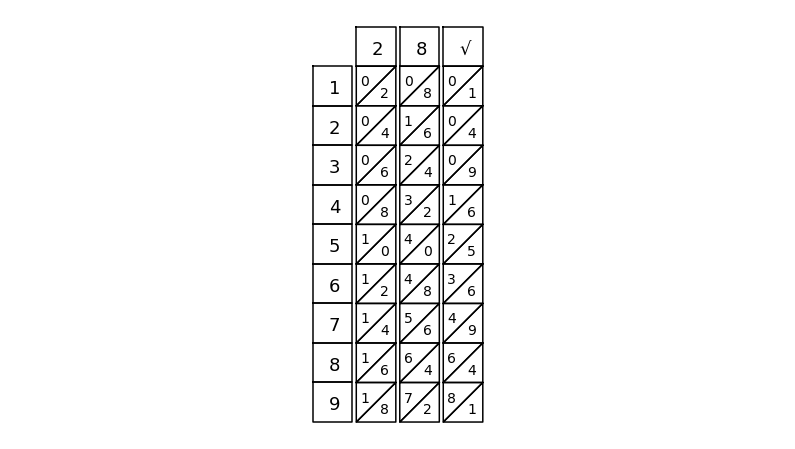

In [45]:
nb = napier_bone()

nb.place(0)
nb.place(2)
nb.place(8)
nb.place(True, sqrt=True)

nb.draw()

<pre>
 <u>  2 8 2</u>
)2        141
 <u>1  </u>
 100
 <u> 96  </u>
   400
   <u>281  </u>
   11900
</pre>

* place 282 bone(s), to find largest less than current remainder: 11900
  - from the 4-th row, 11296 is found

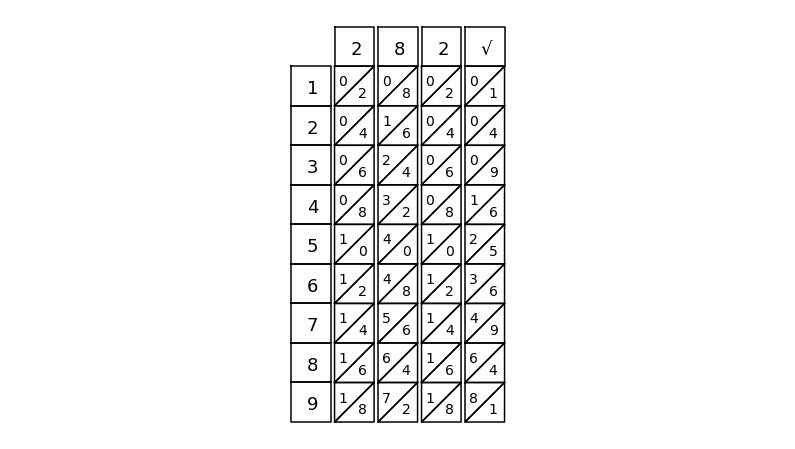

In [46]:
nb = napier_bone()

nb.place(0)
nb.place(2)
nb.place(8)
nb.place(2)
nb.place(True, sqrt=True)

nb.draw()

<pre>
 <u>  2 8 2 8</u>
)2          1414
 <u>1  </u>
 100
 <u> 96  </u>
   400
   <u>281  </u>
   11900
   <u>11296  </u>
     60400
</pre>

* place 2828 bone(s), to find largest less than current remainder: 60400
  - from the 2-th row, 56564 is found

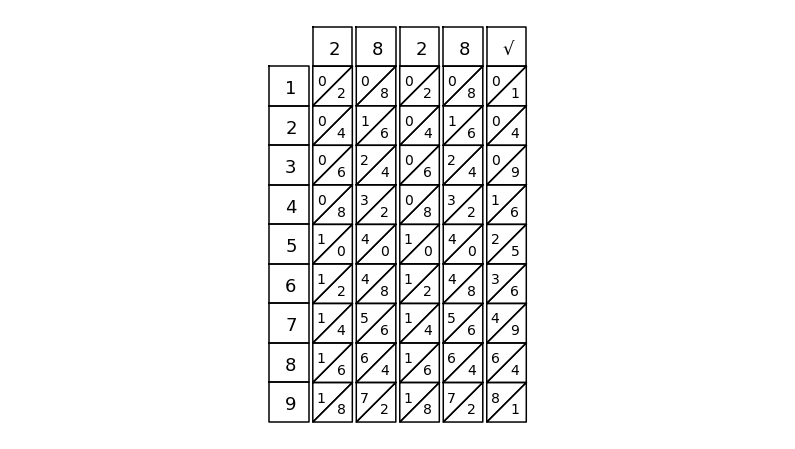

In [38]:
nb = napier_bone()

nb.place(0)
nb.place(2)
nb.place(8)
nb.place(2)
nb.place(8)
nb.place(1, sqrt=True)

nb.draw()

<pre>
 <u>  2 8 2 8 4</u>
)2            14142
 <u>1  </u>
 100
 <u> 96  </u>
   400
   <u>281  </u>
   11900
   <u>11296  </u>
     60400
     <u>56564  </u>
      383600
</pre>

* place 28284 bone(s), to find largest less than current remainder: 383600
  - from the 1-th row, 282841 is found

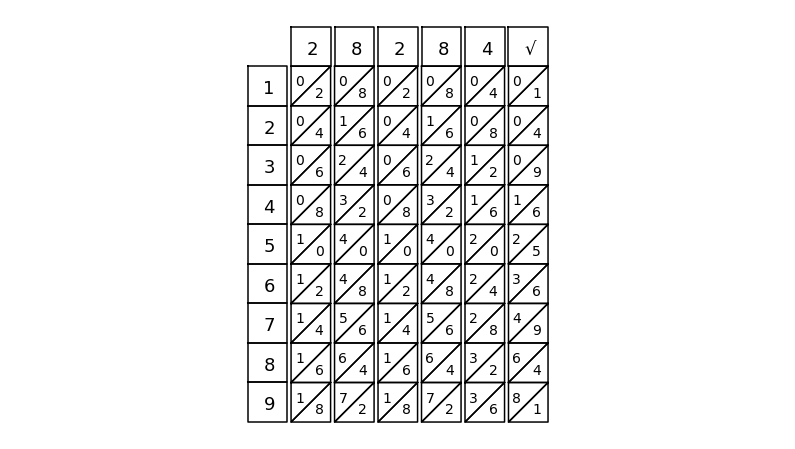

In [39]:
nb = napier_bone()

nb.place(0)
nb.place(2)
nb.place(8)
nb.place(2)
nb.place(8)
nb.place(4)
nb.place(1, sqrt=True)

nb.draw()

<pre>
 <u>  2 8 2 8 4</u>
)2            141421
 <u>1  </u>
 100
 <u> 96  </u>
   400
   <u>281  </u>
   11900
   <u>11296  </u>
     60400
     <u>56564  </u>
      383600
      282941
</pre>

* Extracting square roots
  - [Napier's bones - Wikipedia](https://en.wikipedia.org/wiki/Napier%27s_bones#Extracting_square_roots)

$46,785,399$ の平方根を求める

小数点を起点に二桁に分割する: $46$ $78$ $53$ $99$

In [20]:
square_root_by_long_division(46785399)

place 0 bone(s), to find largest less than current remainder: 46
from the 6-th row, 36 is found
place 12 bone(s), to find largest less than current remainder: 1078
from the 8-th row, 1024 is found
place 136 bone(s), to find largest less than current remainder: 5453
from the 3-th row, 4089 is found
place 1366 bone(s), to find largest less than current remainder: 136499
from the 9-th row, 123021 is found
place 13678 bone(s), to find largest less than current remainder: 1347800
from the 9-th row, 1231101 is found
place 136798 bone(s), to find largest less than current remainder: 11669900
from the 8-th row, 10943904 is found
place 1367996 bone(s), to find largest less than current remainder: 72599600
from the 5-th row, 68399825 is found
place 13679970 bone(s), to find largest less than current remainder: 419977500
from the 3-th row, 410399109 is found
place 136799706 bone(s), to find largest less than current remainder: 957839100
from the 0-th row, 0 is found


(683998530, 957839100)

自乗が $46$ を越えない最大の数を探す: $6$

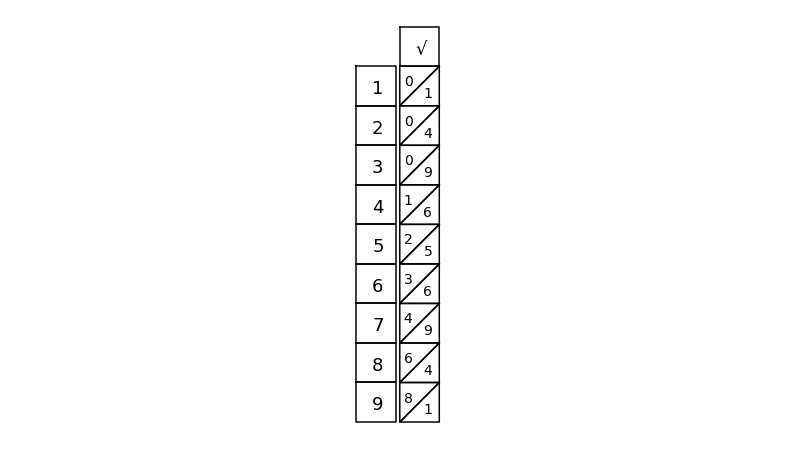

In [23]:
nb = napier_bone()

nb.place(0)
nb.place(1, sqrt=True)

nb.draw()

$6 \times 2 = 12$ のボーンをセットし、前段の余り $1078$ よりも小さい行を探すと 8行目が選択肢となる: $(8+1) \times 100 + (6+6) \times 10 + 4 = 1024$

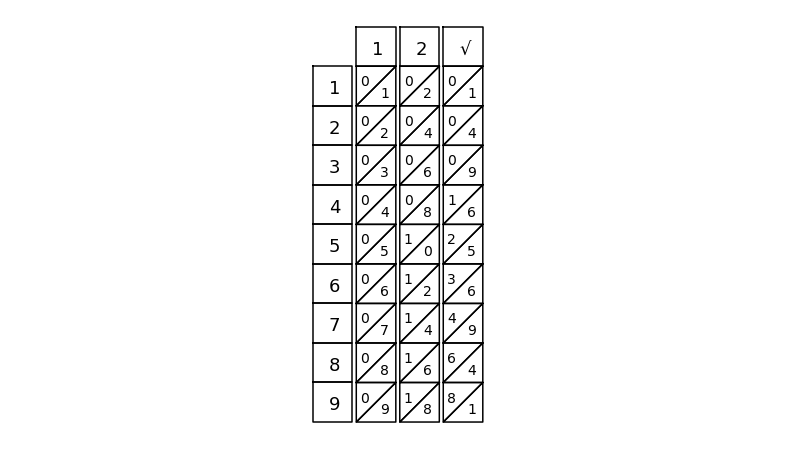

In [24]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(2)
nb.place(1, sqrt=True)

nb.draw()

$68 \times 2 = 136$ のボーンをセットし、前段の余り $5453$ よりも小さい行を探すと 3 行目が選択肢となる: $(3+0) \times 1000 + (9+1) \times 100 + (8+0) \times 10 + 9 = 4089$

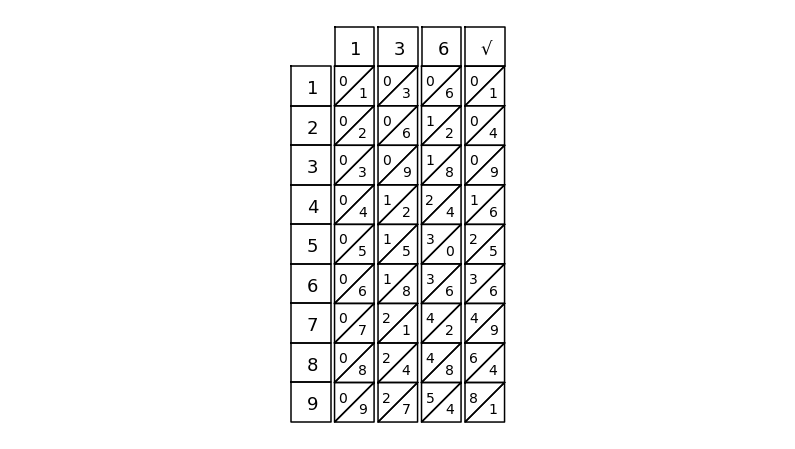

In [26]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(3)
nb.place(6)
nb.place(1, sqrt=True)

nb.draw()

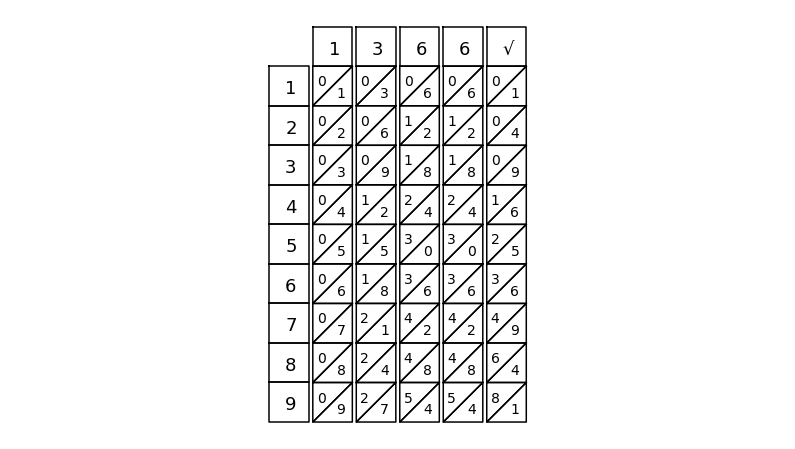

In [27]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(3)
nb.place(6)
nb.place(6)
nb.place(1, sqrt=True)

nb.draw()

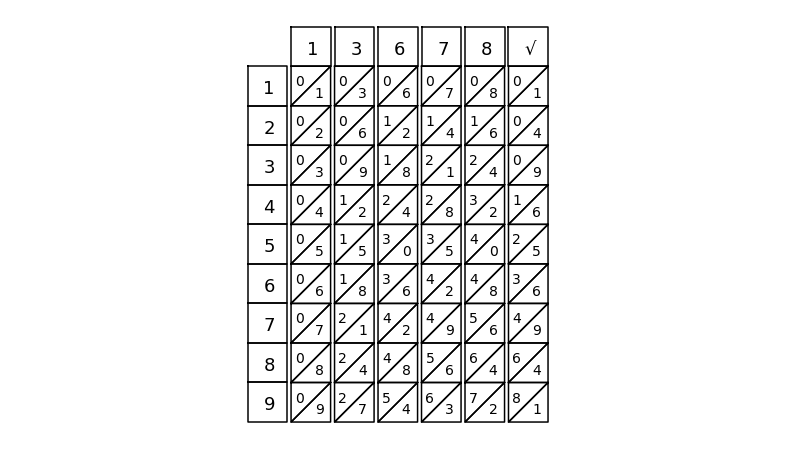

In [28]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(3)
nb.place(6)
nb.place(7)
nb.place(8)
nb.place(1, sqrt=True)

nb.draw()

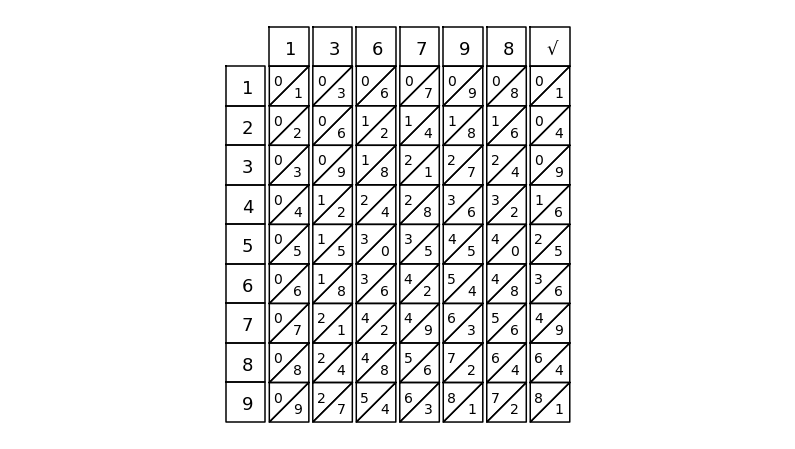

In [29]:
nb = napier_bone()

nb.place(0)
nb.place(1)
nb.place(3)
nb.place(6)
nb.place(7)
nb.place(9)
nb.place(8)
nb.place(1, sqrt=True)

nb.draw()

In [47]:
6839.98**2

46785326.40039999